### import requirements library

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import os

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, Dropout, BatchNormalization
import tensorflow_hub as hub

### dataset path 

In [5]:
data_path = 'cassava-leaf-disease-classification'

train_csv_data_path = os.path.join(data_path, 'train.csv')
label_json_data_path = os.path.join(data_path, 'label_num_to_disease_map.json')
images_dir_data_path = os.path.join(data_path, 'train_images')

In [12]:
train_csv = pd.read_csv(train_csv_data_path)
label_class = pd.read_json(label_json_data_path, orient='index')
label_class

,0
0,Cassava Bacterial Blight (CBB)
1,Cassava Brown Streak Disease (CBSD)
2,Cassava Green Mottle (CGM)
3,Cassava Mosaic Disease (CMD)
4,Healthy


In [13]:
train_csv.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


### input detail

In [17]:
Batch_Size = 16
Image_Width = 300
Image_Height = 300
Image_Channel = 3
num_classes = 5

### load EfficientNet(B0, B1, B2, ...., B7) models from tensorflow_hub

In [26]:
model = tf.keras.Sequential([
    hub.KerasLayer("models/pretrained/efficientnet_b0_feature-vector_1/", # you need to set to "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   multiple                  4049564   
_________________________________________________________________
dense_2 (Dense)              multiple                  6405      
Total params: 4,055,969
Trainable params: 6,405
Non-trainable params: 4,049,564
_________________________________________________________________


## prepare data for training 

### label bar plot

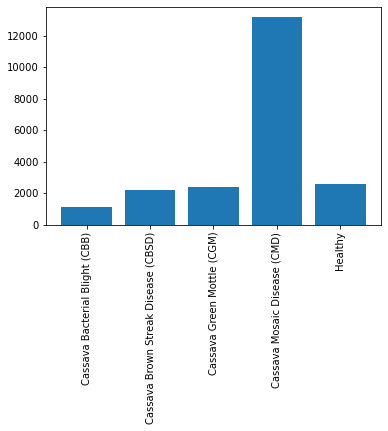

In [80]:
train_data = train_csv.to_numpy()

class_number_data = {label_class.to_dict()[0][counter] : sum(train_data[:,1] == counter) for counter in range(5)}

plt.bar(range(len(class_number_data)), list(class_number_data.values()), align='center')
plt.xticks(range(len(class_number_data)), list(class_number_data.keys()), rotation=90)
plt.show()

### Show some sample images

In [ ]:


img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 3)/255

plt.figure(figsize=(8,4))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])